http://wiki.ros.org/rosbag/Cookbook

## 1.2 Change Timestamps to Header's
useful for laggy recording

In [2]:
import rosbag

with rosbag.Bag('outbag.bag', 'w') as outbag: # w for write
    for topic, msg, t in rosbag.Bag('input.bag').read_messages():
        # This also replaces tf timestamps under the assumption
        # that all transforms in the message share the same timestamp
        if topic == '/tf' and msg.transforms:
            outbag.write(topic, msg, msg.transforms[0].header.stamp)
        else:
            outbag.write(topic, msg, msg.header.stamp if msg._has_header else t)

FileNotFoundError: [Errno 2] No such file or directory: 'input.bag'

## 1.3 Appending Metadata

In [ ]:
import rosbag
import rospy

with rosbag.Bag("foo0.bag", "a") as bag: # a for append
    from std_msgs.msg import String
    metadata_msg = String(data="my metadata")
    bag.write("/metadata", metadata_msg, rospy.Time(bag.get_end_time())) # append after final timestamp

## 1.4 Summary of .bag

In [3]:
import yaml
from rosbag.bag import Bag

info_dict = yaml.safe_load(Bag("foo0.bag", "r")._get_yaml_info()) # r for read

# print("info_dict",info_dict)

for k, v in info_dict.items():
    if k != "types" and k != "topics":
        print(k,v)
# print(info_dict["topics"]) # list of dicts

for val in info_dict["topics"]:
    for k, v in val.items(): # human-readable
        if k == "topic":
            print()
        print(k+": "+str(v))
        

path foo0.bag
version 2.0
duration 360.255161
start 1652478320.92668
end 1652478681.181841
size 27373577
messages 186002
indexed True
compression none

topic: /diagnostics
type: diagnostic_msgs/DiagnosticArray
messages: 251
frequency: 0.6667

topic: /mavlink/from
type: mavros_msgs/Mavlink
messages: 116021
frequency: 486.4935

topic: /mavros/battery
type: sensor_msgs/BatteryState
messages: 3031
frequency: 8.9224

topic: /mavros/global_position/compass_hdg
type: std_msgs/Float64
messages: 3327
frequency: 9.7972

topic: /mavros/global_position/global
type: sensor_msgs/NavSatFix
messages: 3325
frequency: 9.8142

topic: /mavros/global_position/local
type: nav_msgs/Odometry
messages: 3324
frequency: 9.8017

topic: /mavros/global_position/raw/fix
type: sensor_msgs/NavSatFix
messages: 352
frequency: 0.9946

topic: /mavros/global_position/raw/gps_vel
type: geometry_msgs/TwistStamped
messages: 351
frequency: 0.9945

topic: /mavros/global_position/raw/satellites
type: std_msgs/UInt32
messages: 35

## 1.5 Get List of Topics and Msg Type
slower than info_dict

In [4]:
import rosbag
bag = rosbag.Bag('foo0.bag')
# get_type_and_topic_info()[0] is topic key: hash value format
# get_type_and_topic_info()[1] is topic key: {key: float value} format
# 
topics = bag.get_type_and_topic_info()[1].keys() # keys are topics
types = []
count = []
frequencies = []
for i in range(0,len(bag.get_type_and_topic_info()[1].values())): 
    # parse as list() to make subscriptable 
    types.append(list(bag.get_type_and_topic_info()[1].values())[i][0])
    # list(bag.get_type_and_topic_info()[1].values())[i]
    # [msg_type, message_count, connections, frequency]
    count.append(list(bag.get_type_and_topic_info()[1].values())[i][1])
    frequencies.append(list(bag.get_type_and_topic_info()[1].values())[i][3])

for to, ty, co, fr in zip(topics, types, count, frequencies): # parse human-readable
    print('Topic:', to)
    print('Msg Type:', ty)
    print('Msg Count:', co)
    print('Frequency:', fr) # more sig figs than info_dict
    print()
    

Topic: /diagnostics
Msg Type: diagnostic_msgs/DiagnosticArray
Msg Count: 251
Frequency: 0.6667437112614453

Topic: /mavlink/from
Msg Type: mavros_msgs/Mavlink
Msg Count: 116021
Frequency: 486.49353360784085

Topic: /mavros/battery
Msg Type: sensor_msgs/BatteryState
Msg Count: 3031
Frequency: 8.922399470736268

Topic: /mavros/global_position/compass_hdg
Msg Type: std_msgs/Float64
Msg Count: 3327
Frequency: 9.797234829284928

Topic: /mavros/global_position/global
Msg Type: sensor_msgs/NavSatFix
Msg Count: 3325
Frequency: 9.814210386538145

Topic: /mavros/global_position/local
Msg Type: nav_msgs/Odometry
Msg Count: 3324
Frequency: 9.801745210486219

Topic: /mavros/global_position/raw/fix
Msg Type: sensor_msgs/NavSatFix
Msg Count: 352
Frequency: 0.9945609002281586

Topic: /mavros/global_position/raw/gps_vel
Msg Type: geometry_msgs/TwistStamped
Msg Count: 351
Frequency: 0.9944672837101516

Topic: /mavros/global_position/raw/satellites
Msg Type: std_msgs/UInt32
Msg Count: 352
Frequency: 0.99

## 1.6 Crop

In [6]:
import rosbag

num_msgs = 100

with rosbag.Bag('output.bag', 'w') as outbag:
    for topic, msg, t in rosbag.Bag('input.bag').read_messages():
        while num_msgs:
            outbag.write(topic, msg, t)
            num_msgs -= 1

FileNotFoundError: [Errno 2] No such file or directory: 'input.bag'

In [ ]:
import bagpy
from bagpy import bagreader
import pandas as pd

b = bagreader('foo0.bag')

In [73]:
# this is most readable
b.topic_table

,Topics,Types,Message Count,Frequency
0,/diagnostics,diagnostic_msgs/DiagnosticArray,251,0.666744
1,/mavlink/from,mavros_msgs/Mavlink,116021,486.493534
2,/mavros/battery,sensor_msgs/BatteryState,3031,8.922399
3,/mavros/global_position/compass_hdg,std_msgs/Float64,3327,9.797235
4,/mavros/global_position/global,sensor_msgs/NavSatFix,3325,9.814210
5,/mavros/global_position/local,nav_msgs/Odometry,3324,9.801745
6,/mavros/global_position/raw/fix,sensor_msgs/NavSatFix,352,0.994561
7,/mavros/global_position/raw/gps_vel,geometry_msgs/TwistStamped,351,0.994467
8,/mavros/global_position/raw/satellites,std_msgs/UInt32,352,0.994423
9,/mavros/global_position/rel_alt,std_msgs/Float64,3323,9.796022


## Extract All Topics to .csv s

In [5]:
csvfiles = []
for t in b.topics:
    data = b.message_by_topic(t)
    csvfiles.append(data)

NameError: name 'b' is not defined

In [100]:
print(data)

foo0/tf_static.csv


In [155]:
battery = pd.read_csv("foo0/mavros-battery.csv")
rc_ovverride = pd.read_csv("foo0/mavros-rc-override.csv")
alt = pd.read_csv("foo0/mavros-global_position-rel_alt.csv")
rc_out = pd.read_csv("foo0/mavros-rc-out.csv")
rc_in = pd.read_csv("foo0/mavros-rc-in.csv")
rc_or = pd.read_csv("foo0/mavros-rc-override.csv")
rc_out

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,channels_0,channels_1,channels_2,channels_3,channels_4,...,channels_6,channels_7,channels_8,channels_9,channels_10,channels_11,channels_12,channels_13,channels_14,channels_15
0,1.652478e+09,33027,1652478321,132068160,NaN,1500,1500,1500,1500,1600,...,1400,1400,1100,1500,0,0,0,0,0,0
1,1.652478e+09,33028,1652478321,232255224,NaN,1500,1500,1500,1500,1600,...,1400,1400,1100,1500,0,0,0,0,0,0
2,1.652478e+09,33029,1652478321,352106056,NaN,1500,1500,1500,1500,1600,...,1400,1400,1100,1500,0,0,0,0,0,0
3,1.652478e+09,33030,1652478321,472065888,NaN,1500,1500,1500,1500,1600,...,1400,1400,1100,1500,0,0,0,0,0,0
4,1.652478e+09,33031,1652478321,572059488,NaN,1500,1500,1500,1500,1600,...,1400,1400,1100,1500,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,1.652479e+09,36237,1652478680,758341832,NaN,1500,1500,1500,1500,1500,...,1500,1500,1100,1500,0,0,0,0,0,0
3211,1.652479e+09,36238,1652478680,858602112,NaN,1500,1500,1500,1500,1500,...,1500,1500,1100,1500,0,0,0,0,0,0
3212,1.652479e+09,36239,1652478680,958411112,NaN,1500,1500,1500,1500,1500,...,1500,1500,1100,1500,0,0,0,0,0,0
3213,1.652479e+09,36240,1652478681,58302720,NaN,1500,1500,1500,1500,1500,...,1500,1500,1100,1500,0,0,0,0,0,0


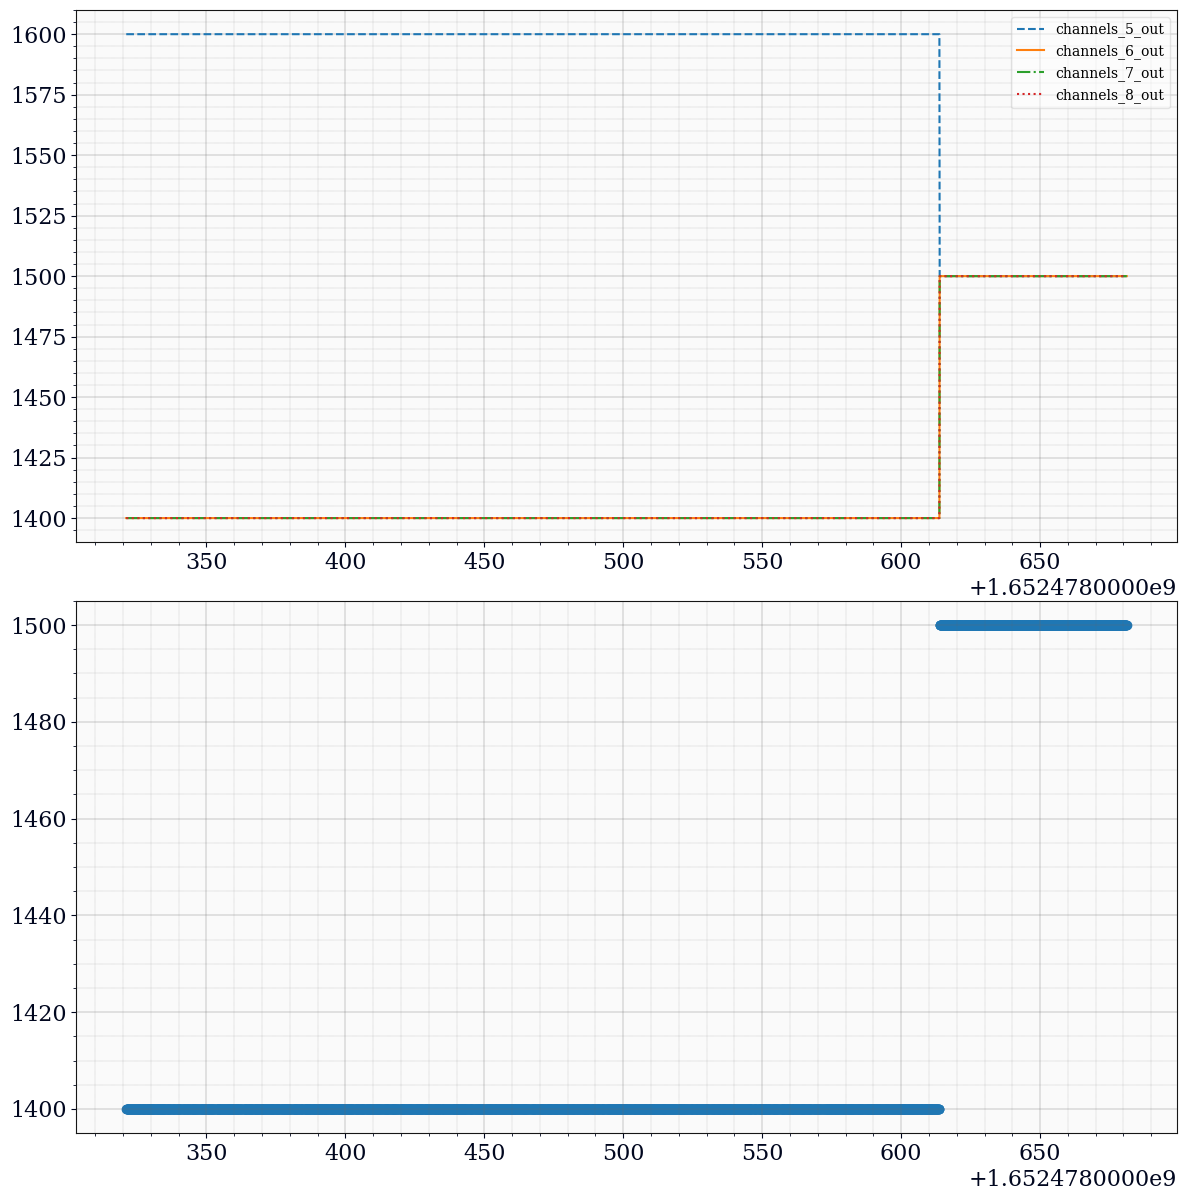

In [173]:
fig, ax = bagpy.create_fig(2)
# s is dot size
# ax[0].scatter(x = 'Time', y='voltage', data = battery, s=1, label ='voltage')
# ax[1].scatter(x = 'Time', y='current', data = battery, s=1, label ='current')
# ax[2].scatter(x = 'Time', y='channels_2', data = rc_ovverride, s=1, label ='channels_2')
# ax[3].scatter(x = 'Time', y='data', data = alt, s=1, label ='rel_alt')
# i = 4
# ax[0].scatter(x = 'Time', y='channels_{}'.format(i), data = rc_out, label='channels_{}_out'.format(i+1))
# i = 5
# ax[0].scatter(x = 'Time', y='channels_{}'.format(i), data = rc_out, label='channels_{}_out'.format(i+1))
# i = 6
# ax[0].scatter(x = 'Time', y='channels_{}'.format(i), data = rc_out, label='channels_{}_out'.format(i+1))
# i = 7
# ax[0].scatter(x = 'time', y='channels_{}'.format(i), data = rc_out, label='channels_{}_out'.format(i+1))


i = 4
ax[0].plot('Time', 'channels_{}'.format(i), data = rc_out, label='channels_{}_out'.format(i+1), linestyle="--")
i = 5
ax[0].plot('Time', 'channels_{}'.format(i), data = rc_out, label='channels_{}_out'.format(i+1), linestyle="-")
i = 6
ax[0].plot('Time', 'channels_{}'.format(i), data = rc_out, label='channels_{}_out'.format(i+1), linestyle="-.")
i = 7
ax[0].plot('Time', 'channels_{}'.format(i), data = rc_out, label='channels_{}_out'.format(i+1), linestyle=":")
ax[1].scatter(x = 'Time', y='channels_{}'.format(i), data = rc_out, label='channels_{}_out'.format(i+1))
ax[0].legend()